# warp other masks to functional space

In [1]:
import glob
import os
import re
import shutil
import random
import string

import numpy as np
import pandas as pd

import nilearn
from nilearn import plotting, image
from nilearn.input_data import NiftiMasker
import nibabel as nib
from nipype.interfaces import ants
import nighres

import subprocess
import json
import multiprocessing as mp
from functools import partial
import joblib
from joblib import Parallel, delayed
import itertools
from utils import apply_warp

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/scotti/.local/lib/python3.8/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


230118-08:33:48,427 nipype.utils WARNING:
	 A newer version (1.8.4) of nipy/nipype is available. You are using 1.7.0


In [2]:
all_subjects = [x.split('/')[-2].split('-')[-1] for x in sorted(glob.glob('../derivatives/fmriprep/fmriprep/sub*/ses-anatomical'))]
all_subjects

['002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044']

## Warp hardvard oxford masks to functional space

In [3]:
all_subjects = [x.split('/')[-2].split('-')[-1] for x in sorted(glob.glob('../derivatives/fmriprep/fmriprep/sub*/ses-anatomical'))]
# all_subjects = ['024']
def warp_masks_2_t1w(sub, overwrite=True):
    print(sub)
    regex_masks = re.compile('.*/MNI152NLin2009cAsym_1mm_label-(?P<label>\S+).nii.gz')
    all_masks = sorted(glob.glob('../sourcedata/masks/HarvardOxford_MNI152NLin2009cAsym/*.nii.gz'))
    
    output_img_base = f'../derivatives/masks_cortex_func/sub-{sub}/anat/sub-{sub}_space-T1w_desc-mask-{{label}}.nii.gz'
#     print(output_img_base)
    for mask in all_masks:
        mask_label = regex_masks.match(mask).groupdict()['label']

        final_img_fn = output_img_base.format(label=mask_label)
        if not os.path.exists(final_img_fn) or overwrite:
            os.makedirs(os.path.dirname(final_img_fn), exist_ok=True)
            tmp_img_name = apply_warp(mask, sub=sub, t1w_to_MNI=False)
            shutil.move(tmp_img_name, final_img_fn)
            
# _ = [warp_masks_2_t1w(x) for x in all_subjects]
with mp.Pool(20) as p:
    p.map(warp_masks_2_t1w, all_subjects)

003004002006008010012009007005



016011013


014015020
019
018017
021









022
023
024
025
026
027
029
030
031
032
033
034
035
036
037
038
039
040
041
042
043
044


## warp harvard oxford striatum masks to t1 space
not sure which MNI152, but seem to overlap well with MNI152NLin2009cAsym_1mm

In [ ]:
#all_subjects = [x.split('/')[-2].split('-')[-1] for x in sorted(glob.glob('../derivatives/fmriprep/fmriprep/sub*/ses-anatomical'))]
# all_subjects = ['043', '044']
def warp_masks_2_t1w(sub, overwrite=True):
    print(sub)
    regex_masks = re.compile('.*/MNI_1mm_label-(?P<label>\S+).nii.gz')
    all_masks = sorted(glob.glob('../sourcedata/masks/HarvardOxford_striatum/*.nii.gz'))
    
    output_img_base = f'../derivatives/masks_striatum_func/sub-{sub}/anat/sub-{sub}_space-T1w_desc-mask-{{label}}.nii.gz'
#     print(output_img_base)
    for mask in all_masks:
        mask_label = regex_masks.match(mask).groupdict()['label']
        print(mask_label)
        final_img_fn = output_img_base.format(label=mask_label)
        print(final_img_fn)
        if not os.path.exists(final_img_fn) or overwrite:
            os.makedirs(os.path.dirname(final_img_fn), exist_ok=True)
            tmp_img_name = apply_warp(mask, sub=sub, t1w_to_MNI=False)
            shutil.move(tmp_img_name, final_img_fn)
            
# _ = [warp_masks_2_t1w(x) for x in all_subjects]
with mp.Pool(10) as p:
    p.map(warp_masks_2_t1w, all_subjects)

043
044


## warp harvard oxford striatum masks to t1 space
use MNI2009c folder

In [3]:
#all_subjects = [x.split('/')[-2].split('-')[-1] for x in sorted(glob.glob('../derivatives/fmriprep/fmriprep/sub*/ses-anatomical'))]
# all_subjects = ['043', '044']
def warp_masks_2_t1w(sub, overwrite=True):
    print(sub)
    regex_masks = re.compile('.*/MNI152NLin2009cAsym_1mm_label-(?P<label>\S+)_def-img.nii.gz')
    all_masks = sorted(glob.glob('../sourcedata/masks/HarvardOxford_striatum_MNI152NLin2009cAsym/*.nii.gz'))
    
    output_img_base = f'../derivatives/masks_str_func/sub-{sub}/anat/sub-{sub}_space-T1w_desc-mask-{{label}}.nii.gz'
#     print(output_img_base)
    for mask in all_masks:
        mask_label = regex_masks.match(mask).groupdict()['label']
        print(mask_label)
        final_img_fn = output_img_base.format(label=mask_label)
        print(final_img_fn)
        if not os.path.exists(final_img_fn) or overwrite:
            os.makedirs(os.path.dirname(final_img_fn), exist_ok=True)
            tmp_img_name = apply_warp(mask, sub=sub, t1w_to_MNI=False)
            shutil.move(tmp_img_name, final_img_fn)
            
# _ = [warp_masks_2_t1w(x) for x in all_subjects]
with mp.Pool(10) as p:
    p.map(warp_masks_2_t1w, all_subjects)

002008004006010012016018020014









Accumbens-lAccumbens-lAccumbens-lAccumbens-lAccumbens-l
Accumbens-l
Accumbens-lAccumbens-lAccumbens-l
Accumbens-l
../derivatives/masks_str_func/sub-008/anat/sub-008_space-T1w_desc-mask-Accumbens-l.nii.gz


../derivatives/masks_str_func/sub-002/anat/sub-002_space-T1w_desc-mask-Accumbens-l.nii.gz../derivatives/masks_str_func/sub-006/anat/sub-006_space-T1w_desc-mask-Accumbens-l.nii.gz



../derivatives/masks_str_func/sub-016/anat/sub-016_space-T1w_desc-mask-Accumbens-l.nii.gz../derivatives/masks_str_func/sub-012/anat/sub-012_space-T1w_desc-mask-Accumbens-l.nii.gz../derivatives/masks_str_func/sub-004/anat/sub-004_space-T1w_desc-mask-Accumbens-l.nii.gz
../derivatives/masks_str_func/sub-020/anat/sub-020_space-T1w_desc-mask-Accumbens-l.nii.gz
../derivatives/masks_str_func/sub-018/anat/sub-018_space-T1w_desc-mask-Accumbens-l.nii.gz../derivatives/masks_str_func/sub-014/anat/sub-014_space-T1w_desc-mask-Accumbens-l.nii.gz../derivatives/masks_str_func/sub-01

../derivatives/masks_str_func/sub-007/anat/sub-007_space-T1w_desc-mask-Caudate-l.nii.gz
Caudate-l
../derivatives/masks_str_func/sub-011/anat/sub-011_space-T1w_desc-mask-Caudate-l.nii.gz
Caudate-l
../derivatives/masks_str_func/sub-015/anat/sub-015_space-T1w_desc-mask-Caudate-l.nii.gz
Caudate-l
../derivatives/masks_str_func/sub-019/anat/sub-019_space-T1w_desc-mask-Caudate-l.nii.gz
Caudate-l
../derivatives/masks_str_func/sub-017/anat/sub-017_space-T1w_desc-mask-Caudate-l.nii.gz
Caudate-l
../derivatives/masks_str_func/sub-013/anat/sub-013_space-T1w_desc-mask-Caudate-l.nii.gz
Caudate-r
../derivatives/masks_str_func/sub-005/anat/sub-005_space-T1w_desc-mask-Caudate-r.nii.gz
Caudate-l
../derivatives/masks_str_func/sub-009/anat/sub-009_space-T1w_desc-mask-Caudate-l.nii.gz
Caudate-l
../derivatives/masks_str_func/sub-003/anat/sub-003_space-T1w_desc-mask-Caudate-l.nii.gz
Caudate-l
../derivatives/masks_str_func/sub-021/anat/sub-021_space-T1w_desc-mask-Caudate-l.nii.gz
Caudate-r
../derivatives/masks

../derivatives/masks_str_func/sub-022/anat/sub-022_space-T1w_desc-mask-Putamen-r.nii.gz
Putamen-l
../derivatives/masks_str_func/sub-035/anat/sub-035_space-T1w_desc-mask-Putamen-l.nii.gz
Putamen-l
../derivatives/masks_str_func/sub-029/anat/sub-029_space-T1w_desc-mask-Putamen-l.nii.gz
Putamen-l
../derivatives/masks_str_func/sub-031/anat/sub-031_space-T1w_desc-mask-Putamen-l.nii.gz
Putamen-l
../derivatives/masks_str_func/sub-039/anat/sub-039_space-T1w_desc-mask-Putamen-l.nii.gz
Putamen-l
../derivatives/masks_str_func/sub-037/anat/sub-037_space-T1w_desc-mask-Putamen-l.nii.gz
Putamen-l
../derivatives/masks_str_func/sub-033/anat/sub-033_space-T1w_desc-mask-Putamen-l.nii.gz
Putamen-l
../derivatives/masks_str_func/sub-041/anat/sub-041_space-T1w_desc-mask-Putamen-l.nii.gz
Putamen-r
../derivatives/masks_str_func/sub-024/anat/sub-024_space-T1w_desc-mask-Putamen-r.nii.gz
Putamen-r
../derivatives/masks_str_func/sub-026/anat/sub-026_space-T1w_desc-mask-Putamen-r.nii.gz
Putamen-r
../derivatives/masks

../derivatives/masks_str_func/sub-043/anat/sub-043_space-T1w_desc-mask-Putamen-r.nii.gz
044
Accumbens-l
../derivatives/masks_str_func/sub-044/anat/sub-044_space-T1w_desc-mask-Accumbens-l.nii.gz
Accumbens-r
../derivatives/masks_str_func/sub-044/anat/sub-044_space-T1w_desc-mask-Accumbens-r.nii.gz
Caudate-l
../derivatives/masks_str_func/sub-044/anat/sub-044_space-T1w_desc-mask-Caudate-l.nii.gz
Caudate-r
../derivatives/masks_str_func/sub-044/anat/sub-044_space-T1w_desc-mask-Caudate-r.nii.gz
Putamen-l
../derivatives/masks_str_func/sub-044/anat/sub-044_space-T1w_desc-mask-Putamen-l.nii.gz
Putamen-r
../derivatives/masks_str_func/sub-044/anat/sub-044_space-T1w_desc-mask-Putamen-r.nii.gz


# warp HCP_MMP1 IFG masks to functional space

In [4]:
all_subjects = [x.split('/')[-2].split('-')[-1] for x in sorted(glob.glob('../derivatives/fmriprep/fmriprep/sub*/ses-anatomical'))]
# all_subjects = ['024']
def warp_masks_2_t1w(sub, overwrite=True):
    print(sub)
    regex_masks = re.compile('.*/HCP_MMP1_MNI152NLin2009cAsym_1mm_label-(?P<label>\S+).nii.gz')
    all_masks = sorted(glob.glob('../sourcedata/masks/HCP_MMP1_MNI152NLin2009cAsym/*.nii.gz'))
    
    output_img_base = f'../derivatives/masks_HCP_MMP1_func/sub-{sub}/anat/sub-{sub}_space-T1w_desc-mask-{{label}}.nii.gz'
#     print(output_img_base)
    for mask in all_masks:
        mask_label = regex_masks.match(mask).groupdict()['label']

        final_img_fn = output_img_base.format(label=mask_label)
        if not os.path.exists(final_img_fn) or overwrite:
            os.makedirs(os.path.dirname(final_img_fn), exist_ok=True)
            tmp_img_name = apply_warp(mask, sub=sub, t1w_to_MNI=False)
            shutil.move(tmp_img_name, final_img_fn)
            
# _ = [warp_masks_2_t1w(x) for x in all_subjects]
with mp.Pool(20) as p:
    p.map(warp_masks_2_t1w, all_subjects)

002003006004005007010
013011016014
012015
017
020021018
019












009
008
022
023
024
025
026
027
029
030
031
032
033
034
035
036
037038

039
040
041
042
043
044


# Convert AAL3 atlas from SPM MNI to MNI200cAsym

use ants registration in nighres to register weird SPM MNI image to MNI2009c

In [26]:
import nighres

def apply_ants(source,target):
    
    nighres.registration.embedded_antsreg(source,target,run_rigid=True,run_affine=False,ignore_header=True,ignore_affine=True, overwrite=True,
                                         save_data=True,output_dir='../sourcedata/masks/aal3_atlas',file_name='AAL3v1_MNI_to_MNI2009c.nii.gz')

source = '../sourcedata/masks/aal3_atlas/ROI_MNI_V7_1mm.nii.gz'
target = '../sourcedata/templates/mni_icbm152_t1_tal_nlin_asym_09c_brain.nii'
apply_ants(source,target)


Embedded ANTs Registration Multi-contrasts

Outputs will be saved to ../sourcedata/masks/aal3_atlas/

Saving ../sourcedata/masks/aal3_atlas/AAL3v1_MNI_to_MNI2009c_tmp_srcimg0.nii.gz

Saving ../sourcedata/masks/aal3_atlas/AAL3v1_MNI_to_MNI2009c_tmp_trgimg0.nii.gz

Saving ../sourcedata/masks/aal3_atlas/AAL3v1_MNI_to_MNI2009c_tmp_srccoord.nii.gz

Saving ../sourcedata/masks/aal3_atlas/AAL3v1_MNI_to_MNI2009c_tmp_trgcoord.nii.gz
registering ../sourcedata/masks/aal3_atlas/AAL3v1_MNI_to_MNI2009c_tmp_srcimg0.nii.gz
 to ../sourcedata/masks/aal3_atlas/AAL3v1_MNI_to_MNI2009c_tmp_trgimg0.nii.gz
antsRegistration --collapse-output-transforms 1 --dimensionality 3 --initialize-transforms-per-stage 0 --interpolation Linear --output AAL3v1_MNI_to_MNI2009c_tmp_syn --transform Rigid[0.1] --metric MI[../sourcedata/masks/aal3_atlas/AAL3v1_MNI_to_MNI2009c_tmp_trgimg0.nii.gz, ../sourcedata/masks/aal3_atlas/AAL3v1_MNI_to_MNI2009c_tmp_srcimg0.nii.gz, 1.000, 32, Random, 0.3 ] --convergence [1000x1000x1000, 1e-06

In [19]:
import nipype
import nibabel as nib
import os
import random
import string
import glob

# make sure you dont input a 4D image
def apply_mni_warp(img,interpolation='Linear'):
    ''' img can be a file path (preferred) OR a nifti1Image (which will be temporarily saved and then provided as a filepath to ants) '''
    from nipype.interfaces import ants

    if isinstance(img, str):
        if not os.path.exists(img):
            raise(IOError('img must either be a string pointing to an existing file, or a Nifti1Image. You passed: {}'.format(img)))
        input_is_img = False
    elif isinstance(img, nib.Nifti1Image):
        # save file, use a random string in name
        import random
        import string

        tmp1_name = './tmp_img_to_warp-{}.nii.gz'.format(''.join(random.choices(string.ascii_letters + string.digits, k=10)))
        img.to_filename(tmp1_name)  # save to temporary file
        img = tmp1_name
        input_is_img = True
    else:
        raise(IOError('Input type not understood... img must either be a string pointing to an existing file, or a Nifti1Header. You passed: {}'.format(img)))
    
    # find affine & composite warp
#     if t1w_to_MNI:
    ## warping an img from functional T1w space (1.5 mm) to MNI2009c (1 mm)
    composite_warp_name = 'from-MNI_to-MNI152NLin2009b'
    template_brain = '../sourcedata/templates/mni_icbm152_nlin_sym_09b/mni_icbm152_t1_tal_nlin_sym_09b_hires.nii'
    out_postfix = '_warped_2_MNI2009b'
#     else:
#         ## warping an img from MNI2009c (1 mm) to functional T1w space (1.5 mm)
#         composite_warp_name = 'from-MNI152NLin2009cAsym_to-T1w'
#         # use first bold_ref as reference img
#         boldrefs = sorted(glob.glob(os.path.join('..', 'derivatives', 'fmriprep', 'fmriprep', f'sub-{sub}', 'ses-*', 'func', 
#                                       f'sub-*_ses-*_task-*_run-1_space-T1w_boldref.nii.gz')))
#         template_brain = boldrefs[0]
#         out_postfix = f'_warped_2_T1w_sub-{sub}'

    composite_xfm = '/home/Public/trondheim/sourcedata/templates/MNI_6thgen_2_MNI2009b.h5'
        
#     composite_xfm = os.path.join('..', 'derivatives', 'fmriprep', 'fmriprep', f'sub-{sub}', 'anat', 
#                              f'sub-{sub}_{composite_warp_name}_mode-image_xfm.h5')
#     if not os.path.exists(composite_xfm):
#         # if there's _only_ an anatomical session and no other sessions, the warp (.h5 file) is in a different place with a slightly different name...
#         composite_xfm = os.path.join('..', 'derivatives', 'fmriprep', 'fmriprep', f'sub-{sub}', 'ses-anatomical', 'anat', 
#                              f'sub-{sub}_ses-anatomical_{composite_warp_name}_mode-image_xfm.h5')
    
    output_img_name = os.path.basename(img).replace('.nii.gz', '') + out_postfix + '.nii.gz'
    
    # ants set-up
    warp = ants.ApplyTransforms()
    warp.inputs.input_image = img
    warp.inputs.input_image_type = 0
    warp.inputs.interpolation = interpolation
    warp.inputs.invert_transform_flags = [False] #,False]
    warp.inputs.reference_image = template_brain
    warp.inputs.out_postfix = out_postfix
    
#     if t1w_to_MNI:
#         warp.inputs.transforms = [composite_xfm]
#     else:
#     warp.inputs.transforms = [composite_xfm]
    
    res = warp.run()
    
    if input_is_img:
        os.remove(img)  # remove temporary file again, all we care is the output anyway
    return str(res.outputs.output_image)

In [20]:
new = apply_mni_warp('/home/Public/trondheim/sourcedata/masks/aal3_atlas/ROI_MNI_V7_1mm.nii')

ValueError: ApplyTransforms requires a value for input 'transforms'. For a list of required inputs, see ApplyTransforms.help()

In [15]:
!antsApplyTransforms --default-value 0 --float 0 --input /home/Public/trondheim/sourcedata/masks/aal3_atlas/ROI_MNI_V7_1mm.nii --input-image-type 0 --interpolation Linear --output ROI_MNI_V7_1mm_warped_2_MNI2009b.nii --reference-image ../sourcedata/templates/mni_icbm152_nlin_asym_09b/mni_icbm152_t1_tal_nlin_asym_09b_hires.nii --transform /home/Public/trondheim/sourcedata/templates/MNI_6thgen_2_MNI2009b.h5

HDF5-DIAG: Error detected in HDF5 (1.10.4) thread 0:
  #000: /home/stevenm/bin/ants/ITKv5/Modules/ThirdParty/HDF5/src/itkhdf5/src/H5F.c line 509 in itk_H5Fopen(): unable to open file
    major: File accessibilty
    minor: Unable to open file
  #001: /home/stevenm/bin/ants/ITKv5/Modules/ThirdParty/HDF5/src/itkhdf5/src/H5Fint.c line 1400 in itk_H5F__open(): unable to open file
    major: File accessibilty
    minor: Unable to open file
  #002: /home/stevenm/bin/ants/ITKv5/Modules/ThirdParty/HDF5/src/itkhdf5/src/H5Fint.c line 1700 in itk_H5F_open(): unable to read superblock
    major: File accessibilty
    minor: Read failed
  #003: /home/stevenm/bin/ants/ITKv5/Modules/ThirdParty/HDF5/src/itkhdf5/src/H5Fsuper.c line 623 in itk_H5F__super_read(): truncated file: eof = 8945664, sblock->base_addr = 0, stored_eof = 104117996
    major: File accessibilty
    minor: File has been truncated
Transform reader for /home/Public/trondheim/sourcedata/templates/MNI_6thgen_2_MNI2009b.h5 caught an ITK 

## Pauli atlas



In [50]:
Pauli_labels = {
'1':  "Pu",
'2':   'Ca',
'3':   "NAC",
'4':   'EXA',
'5':   'GPe',
'6':   'GPi',
'7':   'SNc',
'8':   'RN',
'9':   'SNr', 
'10':   'PBP',
'11':  'VTA',
'12':  "VeP",
'13':  'HN',
'14':  'HTH',
'15':  'MN',
'16':  'STH',
}

In [56]:
print(Pauli_labels['3'])

NAC


### rename Pauli files in /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas

In [64]:
structures_list =[x.split('/')[-1] for x in sorted(glob.glob('/home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/CIT168toMNI152_prob_atlas_bilat_1mm__*'))]
structures_list

['CIT168toMNI152_prob_atlas_bilat_1mm__(volume 1).nii.gz',
 'CIT168toMNI152_prob_atlas_bilat_1mm__(volume 10).nii.gz',
 'CIT168toMNI152_prob_atlas_bilat_1mm__(volume 11).nii.gz',
 'CIT168toMNI152_prob_atlas_bilat_1mm__(volume 12).nii.gz',
 'CIT168toMNI152_prob_atlas_bilat_1mm__(volume 13).nii.gz',
 'CIT168toMNI152_prob_atlas_bilat_1mm__(volume 14).nii.gz',
 'CIT168toMNI152_prob_atlas_bilat_1mm__(volume 15).nii.gz',
 'CIT168toMNI152_prob_atlas_bilat_1mm__(volume 16).nii.gz',
 'CIT168toMNI152_prob_atlas_bilat_1mm__(volume 2).nii.gz',
 'CIT168toMNI152_prob_atlas_bilat_1mm__(volume 3).nii.gz',
 'CIT168toMNI152_prob_atlas_bilat_1mm__(volume 4).nii.gz',
 'CIT168toMNI152_prob_atlas_bilat_1mm__(volume 5).nii.gz',
 'CIT168toMNI152_prob_atlas_bilat_1mm__(volume 6).nii.gz',
 'CIT168toMNI152_prob_atlas_bilat_1mm__(volume 7).nii.gz',
 'CIT168toMNI152_prob_atlas_bilat_1mm__(volume 8).nii.gz',
 'CIT168toMNI152_prob_atlas_bilat_1mm__(volume 9).nii.gz']

In [88]:

# #rename Pauli files

# for x, i in enumerate(structures_list):

#         old_label = structures_list[x].split('.')[0]
#         print(old_label)
#         keep_label= old_label.split('_(')[0]
#         old_label= old_label.split('volume ')[1]
#         index = old_label.split(')')[0]
#         new_label = keep_label+Pauli_labels[index]
#         print(new_label)



In [87]:
import os


for x, i in enumerate(structures_list):

        original_label = structures_list[x].split('.')[0]
        print(original_label)
        keep_label= original_label.split('_(')[0]
        old_label= original_label.split('volume ')[1]
        index = old_label.split(')')[0]
        new_label = keep_label+Pauli_labels[index]
        print(new_label)

        old_file = os.path.join('/home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/', original_label+'.nii.gz')
        new_file = os.path.join('/home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/', new_label+'.nii.gz')
        os.rename(old_file, new_file)

CIT168toMNI152_prob_atlas_bilat_1mm__(volume 1)
CIT168toMNI152_prob_atlas_bilat_1mm_Pu
CIT168toMNI152_prob_atlas_bilat_1mm__(volume 10)
CIT168toMNI152_prob_atlas_bilat_1mm_PBP
CIT168toMNI152_prob_atlas_bilat_1mm__(volume 11)
CIT168toMNI152_prob_atlas_bilat_1mm_VTA
CIT168toMNI152_prob_atlas_bilat_1mm__(volume 12)
CIT168toMNI152_prob_atlas_bilat_1mm_VeP
CIT168toMNI152_prob_atlas_bilat_1mm__(volume 13)
CIT168toMNI152_prob_atlas_bilat_1mm_HN
CIT168toMNI152_prob_atlas_bilat_1mm__(volume 14)
CIT168toMNI152_prob_atlas_bilat_1mm_HTH
CIT168toMNI152_prob_atlas_bilat_1mm__(volume 15)
CIT168toMNI152_prob_atlas_bilat_1mm_MN
CIT168toMNI152_prob_atlas_bilat_1mm__(volume 16)
CIT168toMNI152_prob_atlas_bilat_1mm_STH
CIT168toMNI152_prob_atlas_bilat_1mm__(volume 2)
CIT168toMNI152_prob_atlas_bilat_1mm_Ca
CIT168toMNI152_prob_atlas_bilat_1mm__(volume 3)
CIT168toMNI152_prob_atlas_bilat_1mm_NAC
CIT168toMNI152_prob_atlas_bilat_1mm__(volume 4)
CIT168toMNI152_prob_atlas_bilat_1mm_EXA
CIT168toMNI152_prob_atlas_bil


### threshold and binarize

In [95]:
# masks =sorted(glob.glob('/home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/CIT168toMNI152_prob_atlas*'))
# masks

In [92]:
labels = [  "Pu",
  'Ca',
   "NAC",
   'EXA',
  'GPe',
  'GPi',
  'SNc',
   'RN',
   'SNr', 
   'PBP',
 'VTA',
 "VeP",
  'HN',
  'HTH',
 'MN',
 'STH']
labels

['Pu',
 'Ca',
 'NAC',
 'EXA',
 'GPe',
 'GPi',
 'SNc',
 'RN',
 'SNr',
 'PBP',
 'VTA',
 'VeP',
 'HN',
 'HTH',
 'MN',
 'STH']

In [94]:
def threshold_and_binarize(labels):
    
    label = labels
    input_file = '/home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/CIT168toMNI152_prob_atlas_bilat_1mm_'+label+'.nii.gz'
    
    ouput_file_name = '/home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/bin_thresh30/CIT168toMNI152_prob_atlas_bilat_1mm_'+label+'_bin.nii.gz'
    
    
    command = 'fslmaths '+input_file+' -thr 0.3 -bin ' +ouput_file_name
    print(command)
    try:
         subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
    except subprocess.CalledProcessError as e:
        msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
        raise subprocess.CalledProcessError(msg)

    
with mp.Pool(1) as p:
    p.map(threshold_and_binarize, labels)

    

fslmaths /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/CIT168toMNI152_prob_atlas_bilat_1mm_Pu.nii.gz -thr 0.3 -bin /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/bin_thresh30/CIT168toMNI152_prob_atlas_bilat_1mm_Pu_bin.nii.gz
fslmaths /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/CIT168toMNI152_prob_atlas_bilat_1mm_Ca.nii.gz -thr 0.3 -bin /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/bin_thresh30/CIT168toMNI152_prob_atlas_bilat_1mm_Ca_bin.nii.gz
fslmaths /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/CIT168toMNI152_prob_atlas_bilat_1mm_NAC.nii.gz -thr 0.3 -bin /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/bin_thresh30/CIT168toMNI152_prob_atlas_bilat_1mm_NAC_bin.nii.gz
fslmaths /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/CIT168toMNI152_prob_atlas_bilat_1mm_EXA.nii.gz -thr 0.3 -bin /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/

### make bilateral masks / split masks


In [98]:
def split_bilateral_atlas(labels):
    
    label = labels
    input_file = '/home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/bin_thresh30/CIT168toMNI152_prob_atlas_bilat_1mm_'+label+'_bin.nii.gz'
    
    #ouput_file_name = 
    
    
    command = 'fslmaths '+input_file+' -roi 97 -1 -1 -1 -1 -1 -1 -1 /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/'+label+'-r.nii.gz'
    print('create right '+label+ ' mask')
    print(command)
    try:
         subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
    except subprocess.CalledProcessError as e:
        msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
        raise subprocess.CalledProcessError(msg)

    
    command = 'fslmaths '+input_file+' -roi -1 97 -1 -1 -1 -1 -1 -1 /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/'+label+'-l.nii.gz'
    print('create left '+label+ ' mask')

    print(command)
    try:
         subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
    except subprocess.CalledProcessError as e:
        msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
        raise subprocess.CalledProcessError(msg)
    
with mp.Pool(1) as p:
    p.map(split_bilateral_atlas, labels)

    

create right Pumask
fslmaths /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/bin_thresh30/CIT168toMNI152_prob_atlas_bilat_1mm_Pu_bin.nii.gz -roi 97 -1 -1 -1 -1 -1 -1 -1 /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pu-r.nii.gz
create left Pumask
fslmaths /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/bin_thresh30/CIT168toMNI152_prob_atlas_bilat_1mm_Pu_bin.nii.gz -roi -1 97 -1 -1 -1 -1 -1 -1 /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pu-l.nii.gz
create right Camask
fslmaths /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/bin_thresh30/CIT168toMNI152_prob_atlas_bilat_1mm_Ca_bin.nii.gz -roi 97 -1 -1 -1 -1 -1 -1 -1 /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Ca-r.nii.gz
create left Camask
fslmaths /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Pauli_atlas/bin_thresh30/CIT168toMNI152_prob_atlas_bilat_1mm_Ca_bin.nii.gz -roi -1 97 -1 -1 -1 -1 -1 -1 /home/Public/trondheim/sourcedata/masks/Pa

## warp Pauli atlas to t1

In [89]:
all_subjects = [x.split('/')[-2].split('-')[-1] for x in sorted(glob.glob('../derivatives/fmriprep/fmriprep/sub*/ses-anatomical'))]
all_subjects

['002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044']

In [99]:
all_subjects = [x.split('/')[-2].split('-')[-1] for x in sorted(glob.glob('../derivatives/fmriprep/fmriprep/sub*/ses-anatomical'))]
# all_subjects = ['024']
def warp_masks_2_t1w(sub, overwrite=True):
    print(sub)
    regex_masks = re.compile('.*/(?P<label>\S+).nii.gz')
    all_masks = sorted(glob.glob('../sourcedata/masks/Pauli2017_atlas/*.nii.gz'))
    
    output_img_base = f'../derivatives/masks_Pauli_func/sub-{sub}/anat/sub-{sub}_space-T1w_desc-mask-{{label}}.nii.gz'
#     print(output_img_base)
    for mask in all_masks:
        mask_label = regex_masks.match(mask).groupdict()['label']

        final_img_fn = output_img_base.format(label=mask_label)
        if not os.path.exists(final_img_fn) or overwrite:
            os.makedirs(os.path.dirname(final_img_fn), exist_ok=True)
            tmp_img_name = apply_warp(mask, sub=sub, t1w_to_MNI=False)
            shutil.move(tmp_img_name, final_img_fn)
            
# _ = [warp_masks_2_t1w(x) for x in all_subjects]
with mp.Pool(20) as p:
    p.map(warp_masks_2_t1w, all_subjects)

003002005004006009007008010012
011014

013019
020

018017021











015016

022
023024

025
026
027
029
030
031
032
033
034
035
036
037
038
039
040
041
042
043
044


## downsample to functional space

# already done in output of previous step somehow... so, no downsampling required?!

In [118]:
masks =[x.split('/')[-1].split('.')[0]  for x in sorted(glob.glob('/home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/*.nii.gz'))]
masks

['Ca-l',
 'Ca-r',
 'EXA-l',
 'EXA-r',
 'GPe-l',
 'GPe-r',
 'GPi-l',
 'GPi-r',
 'HN-l',
 'HN-r',
 'HTH-l',
 'HTH-r',
 'MN-l',
 'MN-r',
 'NAC-l',
 'NAC-r',
 'PBP-l',
 'PBP-r',
 'Pu-l',
 'Pu-r',
 'RN-l',
 'RN-r',
 'SNc-l',
 'SNc-r',
 'SNr-l',
 'SNr-r',
 'STH-l',
 'STH-r',
 'VTA-l',
 'VTA-r',
 'VeP-l',
 'VeP-r']

### requires all masks combined into one atlas... which is currently not the case for Pauli

or does warp_Pauli_map() do that?

## okay, I give up for now. does not work... 

In [ ]:

def warp_Pauli_map(args, atlas, target_img):
    label_n, label = args
    this_map = atlas.get_fdata().copy()
    this_map[this_map!=(label_n+1)] = 0
    this_map[this_map>0] = 1
    this_map_nii = nib.Nifti1Image(this_map, atlas.affine)

    # ok now we need to do this rather annoying temporary save thing agian
    resampled_img = nilearn.image.resample_to_img(source_img=this_map_nii, target_img=target_img, interpolation='linear')
    return {label: resampled_img}


#
def load_Pauli_atlas_1p5mm(sub,overwrite=True): 
    labels = ['Ca-l','Ca-r', 'EXA-l', 'EXA-r', 'GPe-l', 'GPe-r', 'GPi-l', 'GPi-r', 'HN-l', 'HN-r',
              'HTH-l', 'HTH-r', 'MN-l', 'MN-r', 'NAC-l', 'NAC-r', 'PBP-l','PBP-r','Pu-l','Pu-r',
              'RN-l', 'RN-r', 'SNc-l', 'SNc-r', 'SNr-l', 'SNr-r', 'STH-l', 'STH-r', 'VTA-l', 'VTA-r','VeP-l','VeP-r']


    # save fns
    save_fn_template = f'/home/Public/trondheim/derivatives/masks_Pauli_func/sub-{sub}/anat/sub-{sub}_space-T1w_desc-mask-{{}}.nii.gz'
    if os.path.exists(save_fn_template.format('Ca-l')) and not overwrite:
        # Already warped, load atlas
        maps = {}
        for label in labels:
            maps[label] = nib.load(save_fn_template.format(label))
        
    else:
        atlas_fn = os.path.join('home','Public','trondheim', 'derivatives', 'masks_Pauli_func', f'sub-{sub}', 'anat', f'sub-{sub}_space-T1w_desc-mask-{{}}.nii.gz')
        if not os.path.exists(atlas_fn):
            print(f'Pauli not yet available for sub-{sub} (returning 0 to prevent break)')
            return 0
        target_img = sorted(glob.glob(f'../derivatives/fmriprep/fmriprep/sub-{sub}/ses-*/func/sub-{sub}_ses-*_task-*_run-*_space-T1w_boldref.nii.gz'))[0]
        atlas = nib.load(atlas_fn)

        # now we need to reduce resolution to 1.5mm
        with mp.Pool(32) as p:
            maps = p.map(partial(warp_Pauli_map, atlas=atlas, target_img=target_img), enumerate(labels))
        maps = {list(x.keys())[0]: list(x.values())[0] for x in maps}
        
        # save
        os.makedirs(os.path.dirname(save_fn_template), exist_ok=True)
        for label in labels:
            maps[label].to_filename(save_fn_template.format(label))

    return maps

In [ ]:
with mp.Pool(32) as p:
    maps = p.map(partial(warp_Pauli_map, atlas=atlas, target_img=target_img), enumerate(labels))
    maps = {list(x.keys())[0]: list(x.values())[0] for x in maps}
        
    # save
    os.makedirs(os.path.dirname(save_fn_template), exist_ok=True)
    for label in labels:
        maps[label].to_filename(save_fn_template.format(label))

In [ ]:

all_subjects = [x.split('-')[1].split('.')[0] for x in sorted(glob.glob('../derivatives/fmriprep/fmriprep/sub-*.html'))]
# exclude subs that aren't fmriprepped yet
# all_subjects = ['043','044']
for subject in all_subjects:
    print(subject)
    load_Pauli_atlas_1p5mm(subject)
    

In [145]:
def find_rois(sub, atlas_name='ATAG', space='T1w'):
    if atlas_name == 'ATAG':
        if space == 'MNI152NLin2009cAsym' or space == 'mni':
            ### Rois in MNI09c-space
            mask_dir='/home/Public/trondheim/sourcedata/masks/MNI152NLin2009cAsym_res-1p5'
            fns = sorted(glob.glob(mask_dir + '/space-*'))
            names = [re.match('.*space-(?P<space>[a-zA-Z0-9]+)_res-1p5_label-(?P<label>[a-zA-Z0-9]+)_probseg_def-img.nii.gz', fn).groupdict()['label'] for fn in fns]
        else:
            mask_dir = f'../derivatives/masks_atag_func/sub-{sub}/anat/sub-{sub}_*.nii.gz'
            fns = sorted(glob.glob(mask_dir))
            names = [re.match('.*space-(?P<space>[a-zA-Z0-9]+)_desc-mask-(?P<label>[a-zA-Z0-9]+).nii.gz', fn).groupdict()['label'] for fn in fns]
    elif atlas_name == 'MASSP':
        mask_dir = f'../derivatives/masks_massp_func/sub-{sub}/anat/sub-{sub}_*.nii.gz'
        fns = sorted(glob.glob(mask_dir))
        names = [re.match('.*space-(?P<space>[a-zA-Z0-9]+)_desc-mask-(?P<label>\S+).nii.gz', fn).groupdict()['label'] for fn in fns]
    elif atlas_name == 'Pauli':
        mask_dir = f'../derivatives/masks_Pauli_func/sub-{sub}/anat/sub-{sub}_*.nii.gz'
        fns = sorted(glob.glob(mask_dir))
        names = [re.match('.*space-(?P<space>[a-zA-Z0-9]+)_desc-mask-(?P<label>\S+).nii.gz', fn).groupdict()['label'] for fn in fns]

    roi_dict = dict(zip(names, fns))
    return roi_dict

def load_atlas(sub, atlas_name='Pauli', space='T1w'):
    from nilearn import image
    
    roi_dict = find_rois(sub, atlas_name, space)
    combined = image.concat_imgs(roi_dict.values())
    
    class AttrDict(dict):
        def __init__(self, *args, **kwargs):
            super(AttrDict, self).__init__(*args, **kwargs)
            self.__dict__ = self
            
    roi_atlas = AttrDict({'maps': combined,
                          'labels': roi_dict.keys()})
    
    return roi_atlas

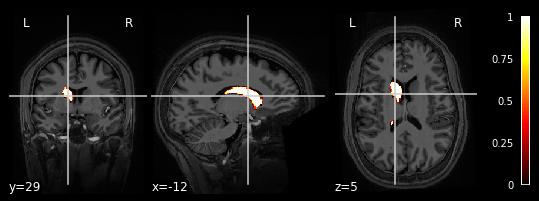

In [101]:
masks_t1w = nib.load('../derivatives/masks_Pauli_func/sub-004/anat/sub-004_space-T1w_desc-mask-Ca-l.nii.gz')
t1w = nib.load('../derivatives/fmriprep/fmriprep/sub-004/anat/sub-004_desc-preproc_T1w.nii.gz')
plotting.plot_stat_map(masks_t1w, bg_img=t1w)

In [148]:
### looks weird here but looks fine in fseleyes

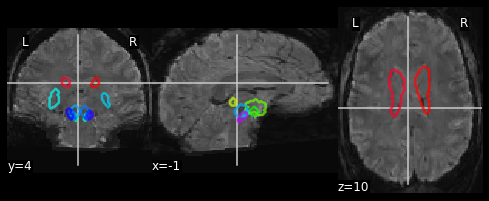

In [147]:
sub = '004'
boldref = sorted(glob.glob(f'../derivatives/fmriprep/fmriprep/sub-{sub}/ses-*/func/sub-{sub}_ses-*_task-*_run-*_space-T1w_boldref.nii.gz'))[3]
nilearn.plotting.plot_prob_atlas(load_atlas(sub).maps, bg_img=boldref)

### ignore below. The lead_dbs atlas version was fucked up, so downloaded it again from neurovault which is already in MNI09c asym space

### coregister Pauli template to mni_icbm152_t1_tal_nlin_asym_09c_brain.nii

rigid registration failed (brain shifted but affines matched)

trying affine registration

In [ ]:
import nighres

def apply_ants(source,target):
    
    nighres.registration.embedded_antsreg(source,target,run_rigid=False,run_affine=True,ignore_header=True,ignore_affine=True, overwrite=True,
                                         save_data=True,output_dir='../sourcedata/masks/Pauli2017_atlas/template',file_name='Pauli2017_MNItemplate_to_MNI09c_asym.nii.gz')

    
source = '/home/atrutti1/Documents/CIT168_T1w_700um.nii.gz'
target = '../sourcedata/templates/mni_icbm152_t1_tal_nlin_asym_09c_brain.nii'
apply_ants(source,target)


Embedded ANTs Registration Multi-contrasts

Outputs will be saved to ../sourcedata/masks/Pauli2017_atlas/template/

Saving ../sourcedata/masks/Pauli2017_atlas/template/Pauli2017_MNItemplate_to_MNI09c_asym_tmp_srcimg0.nii.gz

Saving ../sourcedata/masks/Pauli2017_atlas/template/Pauli2017_MNItemplate_to_MNI09c_asym_tmp_trgimg0.nii.gz

Saving ../sourcedata/masks/Pauli2017_atlas/template/Pauli2017_MNItemplate_to_MNI09c_asym_tmp_srccoord.nii.gz

Saving ../sourcedata/masks/Pauli2017_atlas/template/Pauli2017_MNItemplate_to_MNI09c_asym_tmp_trgcoord.nii.gz
registering ../sourcedata/masks/Pauli2017_atlas/template/Pauli2017_MNItemplate_to_MNI09c_asym_tmp_srcimg0.nii.gz
 to ../sourcedata/masks/Pauli2017_atlas/template/Pauli2017_MNItemplate_to_MNI09c_asym_tmp_trgimg0.nii.gz
antsRegistration --collapse-output-transforms 1 --dimensionality 3 --initialize-transforms-per-stage 0 --interpolation Linear --output Pauli2017_MNItemplate_to_MNI09c_asym_tmp_syn --transform Affine[0.1] --metric MI[../sourcedat

In [49]:

structures =sorted(glob.glob('/home/Public/trondheim/sourcedata/lead_dbs_atlases/CIT168_Reinf_Learn*/mixed/*.nii.gz'))
structures
#structures = [x.split('/')[-1].split('-')[-1] for x in sorted(glob.glob('/home/Public/trondheim/sourcedata/lead_dbs_atlases/CIT168_Reinf_Learn*/mixed/*.nii.gz'))]



['/home/Public/trondheim/sourcedata/lead_dbs_atlases/CIT168_Reinf_Learn (Pauli 2017) - imported from CIT168/mixed/Ca.nii.gz',
 '/home/Public/trondheim/sourcedata/lead_dbs_atlases/CIT168_Reinf_Learn (Pauli 2017) - imported from CIT168/mixed/EXA.nii.gz',
 '/home/Public/trondheim/sourcedata/lead_dbs_atlases/CIT168_Reinf_Learn (Pauli 2017) - imported from CIT168/mixed/GPe.nii.gz',
 '/home/Public/trondheim/sourcedata/lead_dbs_atlases/CIT168_Reinf_Learn (Pauli 2017) - imported from CIT168/mixed/GPi.nii.gz',
 '/home/Public/trondheim/sourcedata/lead_dbs_atlases/CIT168_Reinf_Learn (Pauli 2017) - imported from CIT168/mixed/HN.nii.gz',
 '/home/Public/trondheim/sourcedata/lead_dbs_atlases/CIT168_Reinf_Learn (Pauli 2017) - imported from CIT168/mixed/HTH.nii.gz',
 '/home/Public/trondheim/sourcedata/lead_dbs_atlases/CIT168_Reinf_Learn (Pauli 2017) - imported from CIT168/mixed/MN.nii.gz',
 '/home/Public/trondheim/sourcedata/lead_dbs_atlases/CIT168_Reinf_Learn (Pauli 2017) - imported from CIT168/mixed/

In [ ]:
# the Pauli at;as affines do not seem to match the template...

import nighres

def apply_ants(source,target):
    
    nighres.registration.embedded_antsreg(source,target,run_rigid=False,run_affine=True,ignore_header=True,ignore_affine=True, overwrite=True,
                                         save_data=True,output_dir='../sourcedata/masks/Pauli2017_atlas/template',file_name='Pauli2017_MNItemplate_to_MNI09c_asym.nii.gz')

    
source = '/home/atrutti1/Documents/CIT168_T1w_700um.nii.gz'
target = '../sourcedata/templates/mni_icbm152_t1_tal_nlin_asym_09c_brain.nii'
apply_ants(source,target)

In [37]:

structures_list = [x.split('/')[-1] for x in sorted(glob.glob('/home/Public/trondheim/sourcedata/lead_dbs_atlases/CIT168_Reinf_Learn*/mixed/*.nii.gz'))]
structures_list
#structures = [x.split('/')[-1].split('-')[-1] for x in sorted(glob.glob('/home/Public/trondheim/sourcedata/lead_dbs_atlases/CIT168_Reinf_Learn*/mixed/*.nii.gz'))]



['Ca.nii.gz',
 'EXA.nii.gz',
 'GPe.nii.gz',
 'GPi.nii.gz',
 'HN.nii.gz',
 'HTH.nii.gz',
 'MN.nii.gz',
 'NAC.nii.gz',
 'PBP.nii.gz',
 'Pu.nii.gz',
 'RN.nii.gz',
 'SNc.nii.gz',
 'SNr.nii.gz',
 'STH.nii.gz',
 'VTA.nii.gz',
 'VeP.nii.gz']

In [42]:
structures = []
for x, i in enumerate(structures_list):

    label = structures_list[x].split('.')[0]
    
    structures.append(label)
structures

['Ca',
 'EXA',
 'GPe',
 'GPi',
 'HN',
 'HTH',
 'MN',
 'NAC',
 'PBP',
 'Pu',
 'RN',
 'SNc',
 'SNr',
 'STH',
 'VTA',
 'VeP']

### transform Pauli masks to mni_icbm152_t1_tal_nlin_asym_09c_brain.nii space


In [47]:
def transform_atlas2mni(structure):
    
    print(structure)
    image = '/home/Public/trondheim/sourcedata/lead_dbs_atlases/CIT168_Reinf_Learn (Pauli 2017) - imported from CIT168//mixed/'+structure+'.nii.gz'
    mapping = '/home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/template/Pauli2017_MNItemplate_to_MNI09c_asym_ants-map.nii.gz'
    output_dir='/home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/'
    file_name = structure+'_MNI9c_asym_'
    #print(file_name)
    nighres.registration.apply_coordinate_mappings(image, mapping, output_dir = output_dir, file_name = file_name, save_data=True)
    
with mp.Pool(1) as p:
    p.map(transform_atlas2mni, structures) 
    

Ca

Apply coordinate mappings

Outputs will be saved to /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/
load deformation 1
output dimensions: 193 x 229 x 193(1)
deform image

Saving /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/Ca_MNI9c_asym__def-img.nii.gz
EXA

Apply coordinate mappings

Outputs will be saved to /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/
load deformation 1
output dimensions: 193 x 229 x 193(1)
deform image

Saving /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/EXA_MNI9c_asym__def-img.nii.gz
GPe

Apply coordinate mappings

Outputs will be saved to /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/
load deformation 1
output dimensions: 193 x 229 x 193(1)
deform image

Saving /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/GPe_MNI9c_asym__def-img.nii.gz
GPi

Apply coordinate mappings

Outputs will be saved to /home/Public/trondheim/sourcedata/masks/Pauli2017_atlas/
load deformation 1
output dimensions: 193 x 229 x 1

In [ ]:
all_subjects = [x.split('/')[-2].split('-')[-1] for x in sorted(glob.glob('../derivatives/fmriprep/fmriprep/sub*/ses-anatomical'))]
# all_subjects = ['024']
def warp_masks_2_t1w(sub, overwrite=True):
    print(sub)
    regex_masks = re.compile('.*/MNI152NLin2009cAsym_1mm_label-(?P<label>\S+).nii.gz')
    all_masks = sorted(glob.glob('../sourcedata/lead_dbs_atlases/CIT168_Reinf_Learn*/*.nii.gz'))
    
    output_img_base = f'../derivatives/masks_Pauli2017_func/sub-{sub}/anat/sub-{sub}_space-T1w_desc-mask-{{label}}.nii.gz'
#     print(output_img_base)
    for mask in all_masks:
        mask_label = regex_masks.match(mask).groupdict()['label']

        final_img_fn = output_img_base.format(label=mask_label)
        if not os.path.exists(final_img_fn) or overwrite:
            os.makedirs(os.path.dirname(final_img_fn), exist_ok=True)
            tmp_img_name = apply_warp(mask, sub=sub, t1w_to_MNI=False)
            shutil.move(tmp_img_name, final_img_fn)
            
# _ = [warp_masks_2_t1w(x) for x in all_subjects]
with mp.Pool(20) as p:
    p.map(warp_masks_2_t1w, all_subjects)

# warp Pijnenburg Brodmann atlas

## co-register MNI templates


In [149]:
import nighres

def apply_ants(source,target):
    
    nighres.registration.embedded_antsreg(source,target,run_rigid=True,run_affine=False,ignore_header=True,ignore_affine=True, overwrite=True,
                                         save_data=True,output_dir='../sourcedata/masks/Pijnenburg_Brodmann',file_name='MNI09a-nlin-sym_to_MNI2009c.nii.gz')

source = '../sourcedata/templates/mni_icbm152_nlin_sym_09a/mni_icbm152_t1_tal_nlin_sym_09a_brain.nii.gz'
target = '../sourcedata/templates/mni_icbm152_t1_tal_nlin_asym_09c_brain.nii'
apply_ants(source,target)


Embedded ANTs Registration Multi-contrasts

Outputs will be saved to ../sourcedata/masks/Pijnenburg_Brodmann/

Saving ../sourcedata/masks/Pijnenburg_Brodmann/MNI09a-nlin-sym_to_MNI2009c_tmp_srcimg0.nii.gz

Saving ../sourcedata/masks/Pijnenburg_Brodmann/MNI09a-nlin-sym_to_MNI2009c_tmp_trgimg0.nii.gz

Saving ../sourcedata/masks/Pijnenburg_Brodmann/MNI09a-nlin-sym_to_MNI2009c_tmp_srccoord.nii.gz

Saving ../sourcedata/masks/Pijnenburg_Brodmann/MNI09a-nlin-sym_to_MNI2009c_tmp_trgcoord.nii.gz
registering ../sourcedata/masks/Pijnenburg_Brodmann/MNI09a-nlin-sym_to_MNI2009c_tmp_srcimg0.nii.gz
 to ../sourcedata/masks/Pijnenburg_Brodmann/MNI09a-nlin-sym_to_MNI2009c_tmp_trgimg0.nii.gz
antsRegistration --collapse-output-transforms 1 --dimensionality 3 --initialize-transforms-per-stage 0 --interpolation Linear --output MNI09a-nlin-sym_to_MNI2009c_tmp_syn --transform Rigid[0.1] --metric MI[../sourcedata/masks/Pijnenburg_Brodmann/MNI09a-nlin-sym_to_MNI2009c_tmp_trgimg0.nii.gz, ../sourcedata/masks/Pij

In [150]:
### check affines

# good!

### convert atlas to MNI09c asym template

In [154]:
import nighres

def apply_ants(source,target):
    
    nighres.registration.embedded_antsreg(source,target,run_rigid=True,run_affine=False,ignore_header=True,ignore_affine=True, overwrite=True,
                                         save_data=True,output_dir='../sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/',file_name='BrodmannICBM152_2_MNI2009c.nii.gz')

source = '../sourcedata/masks/Pijnenburg_Brodmann/Brodmann/Brodmann_ICBM152.nii.gz'
target = '../sourcedata/templates/mni_icbm152_t1_tal_nlin_asym_09c_brain.nii'
apply_ants(source,target)


Embedded ANTs Registration Multi-contrasts

Outputs will be saved to ../sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/

Saving ../sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_tmp_srcimg0.nii.gz

Saving ../sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_tmp_trgimg0.nii.gz

Saving ../sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_tmp_srccoord.nii.gz

Saving ../sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_tmp_trgcoord.nii.gz
registering ../sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_tmp_srcimg0.nii.gz
 to ../sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_tmp_trgimg0.nii.gz
antsRegistration --collapse-output-transforms 1 --dimensionality 3 --initialize-transforms-per-stage 0 --interpolation Linear --output BrodmannICBM152_2_MNI2009c_tmp_syn --transform Rigid[0.1] --metric MI[../sou

### extract Brodmann areas to make dlPFC, mPFC and PPC masks

In [227]:
extract_lh_structures= ['fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 1007 -uthr 1007 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/dlPFC_BA8-BA9-BA46/BA8-l.nii.gz',
                        'fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 1008 -uthr 1008 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/dlPFC_BA8-BA9-BA46/BA9-l.nii.gz',
                        'fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 1038 -uthr 1038 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/dlPFC_BA8-BA9-BA46/BA46-l.nii.gz',
                        'fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 1020 -uthr 1020 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/mPFC_BA24_BA32/BA24-l.nii.gz',
                        'fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 1026 -uthr 1026 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/mPFC_BA24_BA32/BA32-l.nii.gz',
                        'fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 1006 -uthr 1006 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/PPC_BA7_BA40/BA74-l.nii.gz',
                        'fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 1033 -uthr 1033 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/PPC_BA7_BA40/BA40-l.nii.gz']
                        
for command in extract_lh_structures:           

    print(command)
    try:
        subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
    except subprocess.CalledProcessError as e:
        msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
        raise subprocess.CalledProcessError(msg)

                         


fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 1007 -uthr 1007 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/dlPFC_BA8-BA9-BA46/BA8-l.nii.gz
fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 1008 -uthr 1008 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/dlPFC_BA8-BA9-BA46/BA9-l.nii.gz
fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 1038 -uthr 1038 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/dlPFC_BA8-BA9-BA46/BA46-l.nii.gz
fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 1020 -uthr 1020 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann

In [228]:
extract_rh_structures= ['fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 2007 -uthr 2007 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/dlPFC_BA8-BA9-BA46/BA8-r.nii.gz',
                        'fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 2008 -uthr 2008 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/dlPFC_BA8-BA9-BA46/BA9-r.nii.gz',
                        'fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 2038 -uthr 2038 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/dlPFC_BA8-BA9-BA46/BA46-r.nii.gz',
                        'fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 2020 -uthr 2020 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/mPFC_BA24_BA32/BA24-r.nii.gz',
                        'fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 2026 -uthr 2026 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/mPFC_BA24_BA32/BA32-r.nii.gz',
                        'fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 2006 -uthr 2006 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/PPC_BA7_BA40/BA74-r.nii.gz',
                        'fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 2033 -uthr 2033 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/PPC_BA7_BA40/BA40-r.nii.gz']
                        
for command in extract_rh_structures:           

    print(command)
    try:
        subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
    except subprocess.CalledProcessError as e:
        msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
        raise subprocess.CalledProcessError(msg)

                         


fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 2007 -uthr 2007 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/dlPFC_BA8-BA9-BA46/BA8-r.nii.gz
fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 2008 -uthr 2008 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/dlPFC_BA8-BA9-BA46/BA9-r.nii.gz
fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 2038 -uthr 2038 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/dlPFC_BA8-BA9-BA46/BA46-r.nii.gz
fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/BrodmannICBM152_2_MNI2009c_ants-def0.nii.gz -thr 2020 -uthr 2020 /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann

### combine extracted Brodmann areas to make dlPFC, mPFC and PPC masks

In [198]:
masks = [x.split('/')[-1].split('_')[0] for x in sorted(glob.glob('/home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/*BA*'))]
masks

['PPC', 'dlPFC', 'mPFC']

In [200]:
directories = sorted(glob.glob('/home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/*BA*'))
directories

['/home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/PPC_BA7_BA40',
 '/home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/dlPFC_BA8-BA9-BA46',
 '/home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/mPFC_BA24_BA32']

In [229]:
hemispheres = ['l', 'r']


# for directory in directories: 
for mask in masks:
    directory = '/home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/'+mask+'_*'
    output_dir = '/home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/FPN_masks'
#     print(directory)
    for hem in hemispheres:
        list_structures = sorted(glob.glob(directory+'/*'+hem+'.nii.gz'))
#         print(list_structures)
        #if len(list_structures) > 2:

        if mask == 'dlPFC':
            command = 'fslmaths '+list_structures[0]+ ' -add '+list_structures[1]+ ' -add '+list_structures[2]+ ' '+output_dir+'/'+mask+'-'+hem+'.nii.gz'
        else:
            command = 'fslmaths '+list_structures[0]+ ' -add '+list_structures[1]+' '+output_dir+'/'+mask+'-'+hem+'.nii.gz'

        print(command)
        try:
            subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
        except subprocess.CalledProcessError as e:
            msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
            raise subprocess.CalledProcessError(msg)


fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/PPC_BA7_BA40/BA40-l.nii.gz -add /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/PPC_BA7_BA40/BA74-l.nii.gz /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/FPN_masks/PPC-l.nii.gz
fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/PPC_BA7_BA40/BA40-r.nii.gz -add /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/PPC_BA7_BA40/BA74-r.nii.gz /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/FPN_masks/PPC-r.nii.gz
fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/dlPFC_BA8-BA9-BA46/BA46-l.nii.gz -add /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/dlPFC_BA8-BA9-BA46/BA8-l.nii.gz -add /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/dlPFC_BA8-BA9-BA46/BA9-l.nii.gz /home/Public/trond

### binarize


In [244]:
FPN_masks = glob.glob('/home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/FPN_masks/*')

for mask in FPN_masks:
#     print(mask)
    
    command = 'fslmaths '+mask+' -bin '+mask
    
    print(command)
    try:
        subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
    except subprocess.CalledProcessError as e:
        msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
        raise subprocess.CalledProcessError(msg)



fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/FPN_masks/PPC-r.nii.gz -bin /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/FPN_masks/PPC-r.nii.gz
fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/FPN_masks/dlPFC-l.nii.gz -bin /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/FPN_masks/dlPFC-l.nii.gz
fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/FPN_masks/dlPFC-r.nii.gz -bin /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/FPN_masks/dlPFC-r.nii.gz
fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/FPN_masks/mPFC-l.nii.gz -bin /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/FPN_masks/mPFC-l.nii.gz
fslmaths /home/Public/trondheim/sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/FPN_masks/mPFC-r.nii.gz -bin /home/Public/trondheim/sourc

### warp to t1

In [245]:
all_subjects = [x.split('/')[-2].split('-')[-1] for x in sorted(glob.glob('../derivatives/fmriprep/fmriprep/sub*/ses-anatomical'))]
# all_subjects = ['024']
def warp_masks_2_t1w(sub, overwrite=True):
    print(sub)
    regex_masks = re.compile('.*/(?P<label>\S+).nii.gz')
    all_masks = sorted(glob.glob('../sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/FPN_masks/*.nii.gz'))
#     print(all_masks)
    output_img_base = f'../derivatives/masks_FPN_func/sub-{sub}/anat/sub-{sub}_space-T1w_desc-mask-{{label}}.nii.gz'
    print(output_img_base)
    for mask in all_masks:
        mask_label = regex_masks.match(mask).groupdict()['label']
#         print(mask_label)
        final_img_fn = output_img_base.format(label=mask_label)
        print(final_img_fn)

        if not os.path.exists(final_img_fn) or overwrite:
            os.makedirs(os.path.dirname(final_img_fn), exist_ok=True)
            tmp_img_name = apply_warp(mask, sub=sub, t1w_to_MNI=False)
            shutil.move(tmp_img_name, final_img_fn)
            
# _ = [warp_masks_2_t1w(x) for x in all_subjects]
with mp.Pool(20) as p:
    p.map(warp_masks_2_t1w, all_subjects)

005003004002007006009010008
012011013014015




018016017
../derivatives/masks_FPN_func/sub-003/anat/sub-003_space-T1w_desc-mask-{label}.nii.gz
020021019




../derivatives/masks_FPN_func/sub-002/anat/sub-002_space-T1w_desc-mask-{label}.nii.gz
../derivatives/masks_FPN_func/sub-006/anat/sub-006_space-T1w_desc-mask-{label}.nii.gz
../derivatives/masks_FPN_func/sub-004/anat/sub-004_space-T1w_desc-mask-{label}.nii.gz../derivatives/masks_FPN_func/sub-007/anat/sub-007_space-T1w_desc-mask-{label}.nii.gz../derivatives/masks_FPN_func/sub-005/anat/sub-005_space-T1w_desc-mask-{label}.nii.gz


../derivatives/masks_FPN_func/sub-008/anat/sub-008_space-T1w_desc-mask-{label}.nii.gz

../derivatives/masks_FPN_func/sub-010/anat/sub-010_space-T1w_desc-mask-{label}.nii.gz
../derivatives/masks_FPN_func/sub-009/anat/sub-009_space-T1w_desc-mask-{label}.nii.gz../derivatives/masks_FPN_func/sub-011/anat/sub-011_space-T1w_desc-mask-{label}.nii.gz
../derivatives/masks_FPN_func/sub-013/anat/sub-013_space-T1w_desc-ma

../derivatives/masks_FPN_func/sub-033/anat/sub-033_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_FPN_func/sub-034/anat/sub-034_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_FPN_func/sub-035/anat/sub-035_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_FPN_func/sub-036/anat/sub-036_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_FPN_func/sub-039/anat/sub-039_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_FPN_func/sub-040/anat/sub-040_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_FPN_func/sub-037/anat/sub-037_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_FPN_func/sub-038/anat/sub-038_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_FPN_func/sub-041/anat/sub-041_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_FPN_func/sub-042/anat/sub-042_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_FPN_func/sub-022/anat/sub-022_space-T1w_desc-mask-dlPFC-l.nii.gz
../derivatives/masks_FPN_func/sub-023/anat/sub-023_space-T1w_desc-mask-dlP

# select and warp masks for Nir-Cohen replication

1. FPN masks

        dlPFC --> BA 8, BA 9, BA 46
         mPFC\ACC --> BA 24, BA 32(we also have an ACC mask though...)
         PPC --> BA 7, BA 40
        --> FPN_masks: ../derivatives/masks_FPN_func/

2. subcortical masks

         caudate -->  Pauli Ca 
         putamen -->  Pauli Pu
        --> derivatives/masks_Pauli_func/

         pallidum --> MASSP GPi, GPe
         thalamus --> MASSP Tha
        --> derivatives/masks_massp_func/



for future analyses (to also look at midbrain) also: 


     MASSP:
        SN
        VTA
        PAG
        STN
        PPN
        RN

     Pauli:
        SNc
        SNr
        VTA
        PBP

### 1. warp FPN masks

In [246]:
all_subjects = [x.split('/')[-2].split('-')[-1] for x in sorted(glob.glob('../derivatives/fmriprep/fmriprep/sub*/ses-anatomical'))]
# all_subjects = ['024']
def warp_masks_2_t1w(sub, overwrite=True):
    print(sub)
    regex_masks = re.compile('.*/(?P<label>\S+).nii.gz')
    all_masks = sorted(glob.glob('../sourcedata/masks/Pijnenburg_Brodmann/MNI09c_Brodmann/FPN_masks/*.nii.gz'))
#     print(all_masks)
    output_img_base = f'../derivatives/masks_WM-rep_func/sub-{sub}/anat/sub-{sub}_space-T1w_desc-mask-{{label}}.nii.gz'
    print(output_img_base)
    for mask in all_masks:
        mask_label = regex_masks.match(mask).groupdict()['label']
#         print(mask_label)
        final_img_fn = output_img_base.format(label=mask_label)
        print(final_img_fn)

        if not os.path.exists(final_img_fn) or overwrite:
            os.makedirs(os.path.dirname(final_img_fn), exist_ok=True)
            tmp_img_name = apply_warp(mask, sub=sub, t1w_to_MNI=False)
            shutil.move(tmp_img_name, final_img_fn)
            
# _ = [warp_masks_2_t1w(x) for x in all_subjects]
with mp.Pool(20) as p:
    p.map(warp_masks_2_t1w, all_subjects)

012002005016015008009007004018006017010014020003011013021019



















../derivatives/masks_WM-rep_func/sub-007/anat/sub-007_space-T1w_desc-mask-{label}.nii.gz../derivatives/masks_WM-rep_func/sub-019/anat/sub-019_space-T1w_desc-mask-{label}.nii.gz../derivatives/masks_WM-rep_func/sub-010/anat/sub-010_space-T1w_desc-mask-{label}.nii.gz../derivatives/masks_WM-rep_func/sub-006/anat/sub-006_space-T1w_desc-mask-{label}.nii.gz../derivatives/masks_WM-rep_func/sub-018/anat/sub-018_space-T1w_desc-mask-{label}.nii.gz../derivatives/masks_WM-rep_func/sub-008/anat/sub-008_space-T1w_desc-mask-{label}.nii.gz../derivatives/masks_WM-rep_func/sub-016/anat/sub-016_space-T1w_desc-mask-{label}.nii.gz../derivatives/masks_WM-rep_func/sub-009/anat/sub-009_space-T1w_desc-mask-{label}.nii.gz../derivatives/masks_WM-rep_func/sub-015/anat/sub-015_space-T1w_desc-mask-{label}.nii.gz../derivatives/masks_WM-rep_func/sub-020/anat/sub-020_space-T1w_desc-mask-{label}.nii.gz../derivatives/masks_WM-rep_func/sub-004

../derivatives/masks_WM-rep_func/sub-030/anat/sub-030_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_WM-rep_func/sub-025/anat/sub-025_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_WM-rep_func/sub-029/anat/sub-029_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_WM-rep_func/sub-026/anat/sub-026_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_WM-rep_func/sub-036/anat/sub-036_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_WM-rep_func/sub-031/anat/sub-031_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_WM-rep_func/sub-038/anat/sub-038_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_WM-rep_func/sub-040/anat/sub-040_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_WM-rep_func/sub-037/anat/sub-037_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_WM-rep_func/sub-033/anat/sub-033_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_WM-rep_func/sub-035/anat/sub-035_space-T1w_desc-mask-PPC-r.nii.gz
../derivatives/masks_WM-rep_func/sub-032/an

### 2. copy Pauli masks

--> Caudate, Putamen, accumbens, VTA, PBP, SNr, SNc

--> also rename VTA to VTAnc

    cd /home/Public/trondheim/derivatives/masks_Pauli_func


    for subject in $(ls -d *)
    do
    echo ${subject}
    cd ${subject}/anat/
    scp ${subject}_space-T1w_desc-mask-Pu-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-Pu-l.nii.gz
    scp ${subject}_space-T1w_desc-mask-Pu-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-Pu-r.nii.gz
    scp ${subject}_space-T1w_desc-mask-Ca-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-Ca-l.nii.gz
    scp ${subject}_space-T1w_desc-mask-Ca-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-Ca-r.nii.gz
    scp ${subject}_space-T1w_desc-mask-NAC-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-NAC-l.nii.gz
    scp ${subject}_space-T1w_desc-mask-NAC-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-NAC-r.nii.gz
    scp ${subject}_space-T1w_desc-mask-PBP-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-PBP-l.nii.gz
    scp ${subject}_space-T1w_desc-mask-PBP-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-PBP-r.nii.gz
    scp ${subject}_space-T1w_desc-mask-VTA-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-VTAnc-l.nii.gz
    scp ${subject}_space-T1w_desc-mask-VTA-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-VTAnc-r.nii.gz
    scp ${subject}_space-T1w_desc-mask-SNr-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-SNr-r.nii.gz
    scp ${subject}_space-T1w_desc-mask-SNr-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-SNr-l.nii.gz
    scp ${subject}_space-T1w_desc-mask-SNr-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-SNr-r.nii.gz
    scp ${subject}_space-T1w_desc-mask-SNr-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-SNr-l.nii.gz
    scp ${subject}_space-T1w_desc-mask-SNc-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-SNc-r.nii.gz
    scp ${subject}_space-T1w_desc-mask-SNc-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-SNc-l.nii.gz
    cd ../../
    done

### 3. copy massp masks

        SN
        VTA
        PAG
        STN
        PPN
        RN

        GPi
        GPe
        Tha

    cd /home/Public/trondheim/derivatives/masks_massp_func
#$(ls -d *)

    for subject in $(ls -d sub-026) 
    do
    echo ${subject}
    cd ${subject}/anat/
    scp ${subject}_space-T1w_desc-mask-VTA-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-VTA-l.nii.gz
    scp ${subject}_space-T1w_desc-mask-VTA-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-VTA-r.nii.gz
    scp ${subject}_space-T1w_desc-mask-Tha-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-Tha-r.nii.gz
    scp ${subject}_space-T1w_desc-mask-Tha-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-Tha-l.nii.gz
    scp ${subject}_space-T1w_desc-mask-SN-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-SN-r.nii.gz
    scp ${subject}_space-T1w_desc-mask-SN-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-SN-l.nii.gz
    scp ${subject}_space-T1w_desc-mask-GPi-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-GPi-l.nii.gz
    scp ${subject}_space-T1w_desc-mask-GPi-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-GPi-r.nii.gz
    scp ${subject}_space-T1w_desc-mask-GPe-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-GPe-l.nii.gz
    scp ${subject}_space-T1w_desc-mask-GPe-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-GPe-r.nii.gz
    scp ${subject}_space-T1w_desc-mask-PAG-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-PAG-l.nii.gz
    scp ${subject}_space-T1w_desc-mask-PAG-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-PAG-r.nii.gz
    scp ${subject}_space-T1w_desc-mask-PPN-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-PPN-l.nii.gz
    scp ${subject}_space-T1w_desc-mask-PPN-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-PPN-r.nii.gz
    scp ${subject}_space-T1w_desc-mask-STN-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-STN-l.nii.gz
    scp ${subject}_space-T1w_desc-mask-STN-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-STN-r.nii.gz
    scp ${subject}_space-T1w_desc-mask-RN-l.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-RN-l.nii.gz
    scp ${subject}_space-T1w_desc-mask-RN-r.nii.gz /home/Public/trondheim/derivatives/masks_WM-rep_func/${subject}/anat/${subject}_space-T1w_desc-mask-RN-r.nii.gz
    cd ../../
    done